<a href="https://colab.research.google.com/github/LuArtale/SkyPhotoTips/blob/master/HPC/Artale_Luciano_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 2: Rotar Imagen


## Introduccion:

En este cuaderno se demuestran las diferencias de ejecucion para una funcion que tiene como objetivo la rotacion de una imagen 90 grados utilizando primero la ejecucion en CPU con python y luego la ejecucion en GPGPU con python y CUDA, todo manejando 2 dimensiones.

## Armado del ambiente:

Para poder ejecutar el ejercicio en ambos casos se debe indicar como parametro la URL de la imagen que se desea rotar, y la misma debe ser una imagen de dominio publico. Luego, se debe ejecutar esta primera seccion de codigo llamada "Obtener imagen a rotar". 

Tambien, para ejecutarlo en GPGPU se debe correr la seccion llamada "Instalacion CUDA para Python".  

Ademas de esto, para CPU se debe seleccionar el entorno de ejecucion "None" y para GPGPU se debe seleccionar el entorno "GPU".

## Obtener imagen a rotar:

In [3]:
#@title # Parámetros de ejecución
# Parametros
#@markdown ### Especifique la URL de la imagen:
url_imagen = "images-assets.nasa.gov/image/PIA13005/PIA13005~orig.jpg" #@param {type:"string"}

if url_imagen != "" :
  !wget {url_imagen} -O imagen.jpg
else:
  print("Se necesita la URL de una imagen")

--2020-12-05 14:45:31--  http://images-assets.nasa.gov/image/PIA13005/PIA13005~orig.jpg
Resolving images-assets.nasa.gov (images-assets.nasa.gov)... 13.249.43.11, 13.249.43.108, 13.249.43.100, ...
Connecting to images-assets.nasa.gov (images-assets.nasa.gov)|13.249.43.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://images-assets.nasa.gov/image/PIA13005/PIA13005~orig.jpg [following]
--2020-12-05 14:45:31--  https://images-assets.nasa.gov/image/PIA13005/PIA13005~orig.jpg
Connecting to images-assets.nasa.gov (images-assets.nasa.gov)|13.249.43.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 608118 (594K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>] 593.87K  --.-KB/s    in 0.007s  

2020-12-05 14:45:32 (78.1 MB/s) - ‘imagen.jpg’ saved [608118/608118]



## Desarrollo para CPU:

Imagen original: imagen.jpg -RGB- [2171, 5085]
Imagen rotada: imagen.jpg -RGB- [5085, 2171]
Tiempos de ejecucion:
* Tiempo de conversión de imagen:  11577.252 [ms]
* Tiempo Total:  12079.821 [ms]


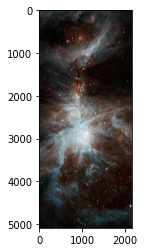

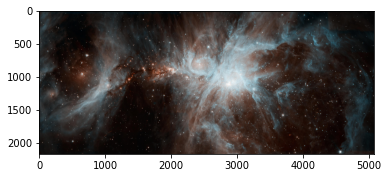

In [3]:
try:
  # --------------------------------------------

  # Importacion de bibliotecas
  %matplotlib inline
  from datetime import datetime

  tiempo_total = datetime.now()

  import  matplotlib.pyplot as plt
  import numpy
  from PIL import Image 
  import math

  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

  # --------------------------------------------
  img_nombre = 'imagen.jpg'
  image = Image.open( img_nombre ) 
    
  # Obtengo las proporciones de la imagen. 
  img_ancho, img_alto = image.size 

  # Convierto la imagen comprimida en JPEG/PNG a array.
  img_original_cpu = numpy.asarray(image)

  # Se crea una nueva imagen con las dimensiones invertidas
  image_rot = Image.new(mode = "RGB", size = (img_alto, img_ancho))
  img_rotada_cpu = numpy.asarray(image_rot).copy()

  # Muestro los atributos de la imagen original y como se ve antes de la rotacion.
  print("Imagen original: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

  plt.figure()
  imgplot=plt.imshow( img_original_cpu )


  tiempo_img = datetime.now()

  # Roto la imagen
  for x in range( 0, img_ancho ):
    for y  in range( 0, img_alto ):
      img_rotada_cpu[x][y] = img_original_cpu[y][x]

  tiempo_img = datetime.now() - tiempo_img

  # Muestro la imagen luego de aplicarle la rotacion.
  print("Imagen rotada: " + img_nombre + " -" + image.mode + "- [" + str(img_alto) + ", " + str(img_ancho) + "]" ) 

  plt.figure()
  imgplot = plt.imshow( img_rotada_cpu )


  tiempo_total = datetime.now() - tiempo_total

  print( "Tiempos de ejecucion:")
  print( "* Tiempo de conversión de imagen: ", tiempo_en_ms( tiempo_img ), "[ms]" )
  print( "* Tiempo Total: ", tiempo_en_ms( tiempo_total ), "[ms]" )

except FileNotFoundError as fnfe:
  print("Error: No se encontro la imagen a rotar. Intente ejecutar la seccion Obtener imagen a rotar nuevamente")

except Exception as excp:
  print("Error de tipo: ", type(excp))
  print("Datos del error: ", excp.args)

### Tabla de pasos CPU:

Procesador | Funcion | Detalle
---------- | ------- | --------
CPU | @param | Lectura de URL de la imagen para guardarla en el storage
CPU | import | Importacion de las bibliotecas a utilizar
CPU | datetime.now() | Se lee el tiempo inicial total
CPU | lambda dt:() | Funcion que transforma el tiempo en milisegundos
CPU | Image.open(img_nombre) | Se carga la imagen en memoria
CPU | image.size | Obtengo las dimensiones de la imagen
CPU | numpy.asarray(image) | Convierto la imagen jpeg a un vector
CPU | Image.new(mode, size) | Creo una nueva imagen resultado vacia con las dimensiones invertidas
CPU | print() | Muestro los atributos de la imagen original
CPU | plt.figure() | Imprimo la imagen original
CPU | datetime.now() | Se lee el tiempo inicial de la rotacion de la imagen
CPU | for | Rotacion de la imagen manejandola como una matriz
CPU | datetime.now() | Se lee el tiempo final de la rotacion de la imagen
CPU | plt.figure() | Imprimo la imagen rotada
CPU | datetime.now() | Se lee el tiempo final total
CPU | print() | Muestro los tiempos de ejecucion

### Conclusiones para CPU:

En este ejercicio (de forma similar al primero) se realizo el procesamiento de datos de forma secuencial en la CPU. En este caso particularmente se realiza la rotacion de una imagen, la cual se debe transformar en un vector y operarla como si fuese una matriz.

Aqui tambien la ventaja que se puede ver es la simplicidad del codigo, ya que, por ejemplo, la seccion en donde se itera sobre la imagen para rotarla (cambiando las posiciones de los pixeles) esta compuesta solo por 3 lineas de codigo.

Por otro lado, al probar con distintas imagenes se ve que la ejecucion tambien es algo lenta, mas aun en este ejercicio ya que se tienen dos bucles, uno dentro de otro.

Por ejemplo, para una imagen de 121x81 pixeles (adjunto el link debajo) la ejecucion del procesamiento de la imagen tarda cerca de 9,27 ms y el total de la ejecucion esta cerca de 43,67 ms. En cambio, para una imagen de 2171x5085 la ejecucion del procesamiento de la imagen tarda cerca de 11374,45 ms y el total de la ejecucion esta cerca de 11876,42 ms.

*   Imagen pequeña (121x81): https://people.csail.mit.edu/billf/project%20pages/sresCode/Markov%20Random%20Fields%20for%20Super-Resolution_files/35008_input.jpg
*   Imagen grande (2171x5085): images-assets.nasa.gov/image/PIA13005/PIA13005~orig.jpg




## Ejecucion para GPU con CUDA:

### Instalar CUDA for python:

In [1]:
!pip install pycuda

     |████████████████████████████████| 1.6MB 14.0MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
  Created wheel for pycuda: filename=pycuda-2020.1-cp36-cp36m-linux_x86_64.whl size=620775 sha256=99d627b61d885274d07fdff73939b8adbed5a8d72797d083a062c125773a4bac
  Stored in directory: /root/.cache/pip/wheels/8f/78/d1/5bb826f81d9d490297a348d818ff3ee6dd6f2075b06dde6ea0
  Created wheel for pytools: filename=pytools-2020.4.3-py2.py3-none-any.whl size=61374 sha256=b5354d2b197653b116fc73c99262d2018e230a565fc83c7d5431d4411a06cf1b
  Stored in directory: /root/.cache/pip/wheels/af/c7/81/a22edb90b0b09a880468b2253bb1df8e9f503337ee15432c64
Successfully built pycuda pytools


### Ejecucion

Thread: [ 32 , 32  ], Bloque : [ 159 , 68 ]
Total de Thread: [ 5088 , 2176  ]  =  11071488
Imagen original: imagen.jpg -RGB- [5085, 2171]
Imagen rotada: imagen.jpg -RGB- [2171, 5085]
Tiempos de ejecucion:
* Tiempo de conversión de imagen en GPU:  0.109 [ms]
* Tiempo Total:  491.896 [ms]


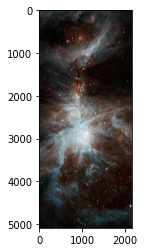

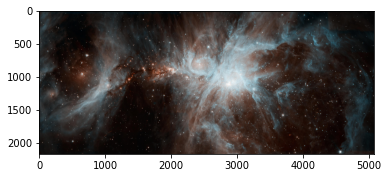

In [12]:
try:
  # --------------------------------------------

  # Importacion de bibliotecas
  %matplotlib inline
  from datetime import datetime
  tiempo_total = datetime.now()

  import matplotlib.pyplot as plt
  import numpy
  from PIL import Image 
  import pycuda.driver as cuda
  import pycuda.autoinit
  from pycuda.compiler import SourceModule

  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

  # --------------------------------------------
  img_nombre = 'imagen.jpg'
  image = Image.open( img_nombre ) 
    
  # Obtengo las proporciones de la imagen.
  img_alto, img_ancho = image.size 

  # Convierto la imagen comprimida en JPEG/PNG a array
  img_orig_cpu = numpy.asarray(image)

  # Se crea una nueva imagen con las dimensiones invertidas
  image_rot = Image.new(mode = "RGB", size = (img_ancho, img_alto)) 
  img_rot_cpu = numpy.empty_like( image_rot)

  # Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
  img_original_gpu = cuda.mem_alloc( img_orig_cpu.nbytes )
  img_rotada_gpu = cuda.mem_alloc( img_rot_cpu.nbytes )

  # GPU - Copio la memoria al GPU.
  cuda.memcpy_htod( img_original_gpu, img_orig_cpu )
  cuda.memcpy_htod( img_rotada_gpu, img_rot_cpu )

  # CPU - Defino la función kernel que ejecutará en GPU.
  module = SourceModule("""
  __global__ void kernel_rotate_img( int ancho, int alto, char *img_O, char *img_R )
  {
    // Calculo las coordenadas del Thread en dos dimensiones.
    int idx = threadIdx.x + blockIdx.x*blockDim.x;
    int idy = threadIdx.y + blockIdx.y*blockDim.y;

    float red = 0.0;
    float green = 0.0;
    float blue = 0.0;

    // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
    if( idx < ancho && idy < alto )
    {
      //Obtengo los valores de cada componente de la imagen original
      red = (float)img_O[(idy+(idx*alto))*3];
      green = (float)img_O[((idy+(idx*alto))*3)+1];
      blue = (float)img_O[((idy+(idx*alto))*3)+2];

      //Asigno los componentes a su lugar correspondiente en la imagen rotada
      img_R[(idx+(idy*ancho))*3] = (char) red;
      img_R[((idx+(idy*ancho))*3)+1] = (char) green;
      img_R[((idx+(idy*ancho))*3)+2] = (char) blue;
    }
  }
  """) 

  # CPU - Genero la función kernel.
  kernel = module.get_function("kernel_rotate_img")

  # Defino los tamaños de los hilos
  dim_hilo_x = 32
  dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x )

  dim_hilo_y = 32
  dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

  print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
  print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

  tiempo_img = datetime.now()

  # Ejecuto el codigo C en el kernel
  kernel( numpy.int32(img_ancho), numpy.int32(img_alto), img_original_gpu, img_rotada_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1) )

  tiempo_img = datetime.now() - tiempo_img

  # GPU - Copio el resultado desde la memoria GPU.
  cuda.memcpy_dtoh( img_rot_cpu, img_rotada_gpu )

  # Muestro la imagen original.
  print("Imagen original: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto) + "]" ) 

  plt.figure()
  imgplot=plt.imshow( img_orig_cpu )

  # Muestro la imagen luego de aplicarle la rotacion.
  print("Imagen rotada: " + img_nombre + " -" + image.mode + "- [" + str(img_alto) + ", " + str(img_ancho) + "]" ) 

  plt.figure()
  imgplot=plt.imshow( img_rot_cpu )


  tiempo_total = datetime.now() - tiempo_total

  print( "Tiempos de ejecucion:")
  print( "* Tiempo de conversión de imagen en GPU: ", tiempo_en_ms( tiempo_img ), "[ms]" )
  print( "* Tiempo Total: ", tiempo_en_ms( tiempo_total ), "[ms]" )

except FileNotFoundError as fnfe:
  print("Error: No se encontro la imagen a rotar. Intente ejecutar la seccion Obtener imagen a rotar nuevamente")

except Exception as excp:
  print("Error de tipo: ", type(excp))
  print("Datos del error: ", excp.args)

### Tabla de pasos GPU:

Procesador | Funcion | Detalle
---------- | ------- | --------
CPU | @param | Lectura de URL de la imagen para guardarla en el storage
CPU | import | Importacion de las bibliotecas a utilizar
CPU | datetime.now() | Se lee el tiempo inicial total
CPU | lambda dt:() | Funcion que transforma el tiempo en milisegundos
CPU | Image.open(img_nombre) | Se carga la imagen en memoria
CPU | image.size | Obtengo las dimensiones de la imagen
CPU | numpy.asarray(image) | Convierto la imagen jpeg a un vector
CPU | Image.new(mode, size) | Creo una nueva imagen resultado vacia con las dimensiones invertidas
**GPU** | cuda.mem_alloc() | Reservo la memoria de GPU para los dos vectores de imagenes
**GPU** | cuda.memcpy_htod() | Copio el contenido de los vectores a la memoria reservada de GPU
CPU | SourceModule() | Se define la funcion kernel a ejecutar en GPU
CPU | module.get_function() | Se generala funcion kernel
CPU | dim_hilo_x = | Defino el tamaño de hilos y bloques en dos dimensiones (x e y)
CPU | datetime.now() | Se lee el tiempo inicial de la rotacion de la imagen
**GPU** | kernel() | Ejecucion de la funcion kernel de rotacion de la imagen
CPU | datetime.now() | Se lee el tiempo final de la rotacion de la imagen
**GPU** | cuda.memcpy_dtoh() | Copio la imagen rotada a la memoria de CPU
CPU | print() | Muestro los atributos de la imagen original
CPU | plt.figure() | Imprimo la imagen original
CPU | print() | Muestro los atributos de la imagen rotada
CPU | plt.figure() | Imprimo la imagen rotada
CPU | datetime.now() | Se lee el tiempo final total
CPU | print() | Muestro los tiempos de ejecucion

### Conclusiones para GPU:

En el entorno de ejecucion de GPU, el ejercicio anteriormente explicado se programa de forma similar, pero utilizando una funcion kernel (como en el ejercicio 1) programado en C con CUDA.

En este caso el codigo es un poco mas complejo que la ejecucion secuencial ya que se necesitan algunas instrucciones mas para reservar la memoria de la GPU y para definir la funcion en codigo C. Ademas de eso, el vector se trata como un vector de enteros y cada pixel esta dividido en sus 3 colores RGB, lo que complejiza un poco los calculos que se deben hacer para rotar la imagen.

Por otro lado, como el codigo CUDA se ejecuta paralelamente no se requieren dos bucles anidados para recorrer todo el vector que representa la imagen, sino que cada hilo se encarga de intercambiar de lugar una cierta cantidad de pixeles de la imagen de forma concurrente entre ellos, y ya que esta es una operacion simple se puede realizar sin problemas y rapidamente por las ALUs de la GPU. De esta forma se obtiene una velocidad de procesamiento de la imagen mucho mayor, siempre que la imagen tenga una alta cantidad de pixeles.

Por ejemplo, para una imagen de 121x81 pixeles (adjunto el link debajo) la ejecucion del procesamiento de la imagen tarda cerca de 0,20 ms y el total de la ejecucion esta cerca de 32,07 ms. En cambio, para una imagen de 2171x5085 la ejecucion del procesamiento de la imagen tarda cerca de 0,21 ms y el total de la ejecucion esta cerca de 479,65 ms.

En esta comparacion de tiempos entre la ejecucion secuencial y paralela se ve como en ambos casos (o sea, incluso con una imagen pequeña) la ejecucion paralela se ejecuta a una mayor velocidad que la secuencial y esto probablemente es por ejecutar en dos dimensiones aqui y en la parte secuencial utilizar bucles anidados.

*   Imagen pequeña (121x81): https://people.csail.mit.edu/billf/project%20pages/sresCode/Markov%20Random%20Fields%20for%20Super-Resolution_files/35008_input.jpg
*   Imagen grande (2171x5085): images-assets.nasa.gov/image/PIA13005/PIA13005~orig.jpg

## Bibliografia:



*   Paper sobre Rotacion, Escala y Traslacion de una imagen con aceleracion de GPU en tiempo real - https://www.researchgate.net/publication/230899846_GPU_Accelerated_Real_Time_Rotation_Scale_and_Translation_Invariant_Image_Registration_Method
*   Carpeta de ejercicios de ejemplo y documentacion de la catedra -  https://github.com/wvaliente/SOA_HPC/blob/main/Ejercicios
*   Material de clase de Sistemas Operativos Avanzados - http://www.so-unlam.net.ar/wiki/index.php/PUBLICO:HPC
*   Introduccion a Google Colaboratory - https://colab.research.google.com/notebooks/intro.ipynb
*   Google Colab Forms - https://colab.research.google.com/notebooks/forms.ipynb 
*   Errors in Python - https://docs.python.org/3/tutorial/errors.html

